In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
df = pd.read_json('train.json')

In [57]:
len(df)

39774

In [59]:
word=input('search:')
results = [i for i in df['ingredients'] if word in i]; len(results)

search:pork


300

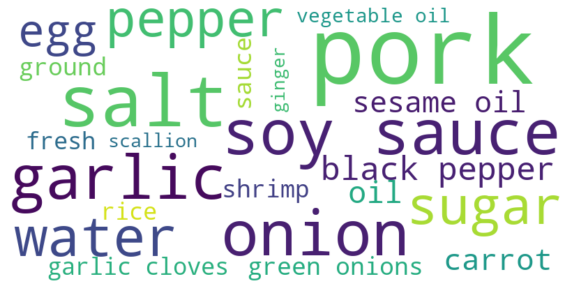

In [63]:
join_em = [' '.join(e) for e in results]
join_em = ' '.join(join_em)

wordcloud = WordCloud(
                      background_color='white',
                      max_words=23,
                      max_font_size=135, 
                      random_state=42,
                      include_numbers=True,
                      width=800,
                      height=400
                      ).generate(join_em)

fig = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()